In [1]:
from Final_Project.muon_propagation import *
from Final_Project.atm_muon import *
from Final_Project.geometry import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_Injected = int(1e7)

# Muon rest mass (MeV)
m0 = 105.6583755

# Muon Momentum in GeV
E_mu = 10**(np.random.uniform(0,4,N_Injected))
kinetic_energy = E_mu - m0*10**(-3)
gammas = gamma_from_KE(KE=kinetic_energy, m=m0*10**(-3))
betas= beta_from_gamma(gamma=gammas)
momentum = betas*gammas*m0*10**(-3)
#momentums = 10**(np.random.uniform(0,5,N_Injected))
# Zenith Distribution of Muon
cos_zenith = np.random.uniform(0,1,N_Injected)
# 
azimuth = np.random.uniform(-np.pi, np.pi, N_Injected)


# Area Injected
size=25
weights = muon_weights(E_mu=E_mu, cos_theta=cos_zenith, area=(2*size)**2,time=1)

x = np.random.uniform(-size,size,N_Injected)
y = np.random.uniform(-size,size,N_Injected)
z = y*0+50

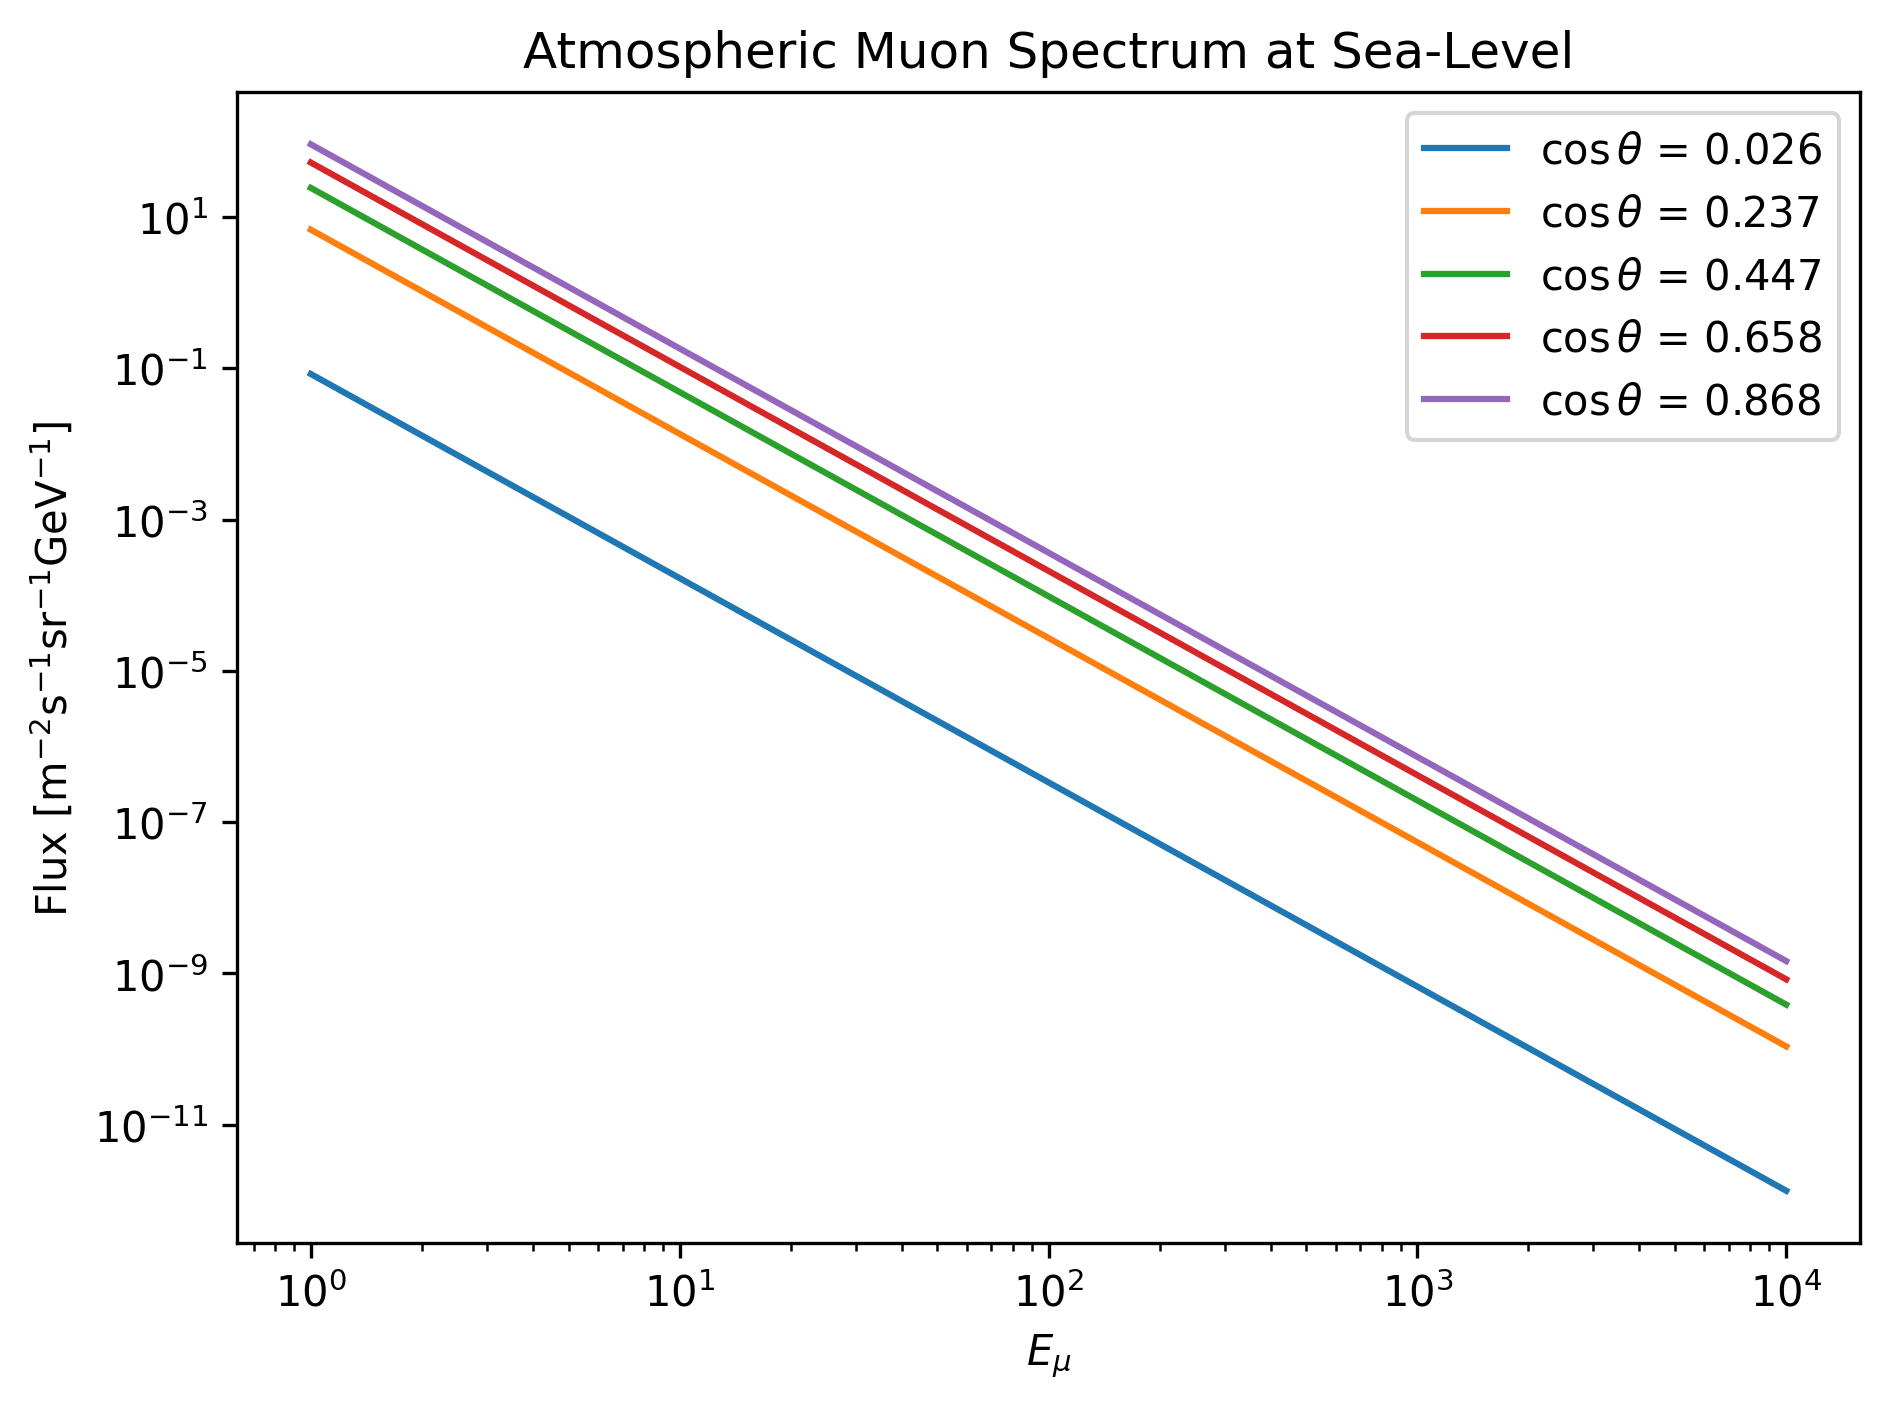

In [8]:
zenith_bins= np.linspace(0,1,20)
zenith_points = (zenith_bins[:-1] + zenith_bins[1:])/2
split_indices = np.digitize(cos_zenith, zenith_bins)  # Split by -1, 0, and 1
bins=np.geomspace(1,1e4,40)

weights= weights/np.sum(weights)*N_Injected
plt.figure(dpi = 300)

# Plot histograms for each range of cos_zenith
for _ in range(0,len(zenith_points),4):
    indices = np.where((split_indices == _ + 1))[0]
    #hist = plt.hist(E_mu[indices], bins=bins, weights=weights[indices], histtype = 'step', label=rf'$\cos \theta$ = {np.round(zenith_points[_],3)}')
    #print(np.sum(hist[0]), np.sum(E_mu[indices]*weights[indices]))
    plt.plot(bins, muon_flux_approximate(bins, zenith_points[_]), label=rf'$\cos \theta$ = {np.round(zenith_points[_],3)}')

plt.title(f'Atmospheric Muon Spectrum at Sea-Level')
plt.xlabel(r'$E_{\mu}$')
plt.ylabel(r'Flux [$\text{m}^{-2} \text{s}^{-1} \text{sr}^{-1} \text{GeV}^{-1}$]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()